In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [2]:
train_dir = 'output/train'
val_dir = 'output/test'


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=24,
    color_mode="grayscale",
    class_mode='categorical',
)


Found 984 images belonging to 41 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=6,
    color_mode="grayscale",
    class_mode='categorical'
)


Found 246 images belonging to 41 classes.


In [7]:
model = Sequential()


In [9]:
model.add(Conv2D(32, (3, 3),
          activation='relu', input_shape=(128, 128, 1)))



In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [11]:
model.add(Conv2D(32, (3, 3), padding="same",
          activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [12]:
model.add(Flatten())


In [13]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(64, activation='relu'))
model.add(Dense(41, activation='softmax'))

In [14]:
model.compile(optimizer='adam', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [18]:
history = model.fit(train_generator,
                    epochs=75,
                    validation_data=test_generator)


Epoch 1/75
41/41 [==============================] - 19s 474ms/step - loss: 0.5982 - accuracy: 0.7774 - val_loss: 0.0549 - val_accuracy: 0.9959
Epoch 2/75
41/41 [==============================] - 18s 437ms/step - loss: 0.5548 - accuracy: 0.8140 - val_loss: 0.0620 - val_accuracy: 0.9837
Epoch 3/75
41/41 [==============================] - 20s 482ms/step - loss: 0.5107 - accuracy: 0.8323 - val_loss: 0.0434 - val_accuracy: 0.9959
Epoch 4/75
41/41 [==============================] - 18s 436ms/step - loss: 0.5367 - accuracy: 0.8211 - val_loss: 0.0509 - val_accuracy: 0.9837
Epoch 5/75
41/41 [==============================] - 18s 434ms/step - loss: 0.4998 - accuracy: 0.8262 - val_loss: 0.0457 - val_accuracy: 0.9919
Epoch 6/75
41/41 [==============================] - 18s 429ms/step - loss: 0.5784 - accuracy: 0.8201 - val_loss: 0.0565 - val_accuracy: 0.9919
Epoch 7/75
41/41 [==============================] - 18s 441ms/step - loss: 0.5450 - accuracy: 0.8100 - val_loss: 0.0404 - val_accuracy: 0.9959

In [19]:
model_json = model.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save_weights('model_updated.h5')
print('Weights saved')


Model Saved
Weights saved


In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Visualizing loss

Text(0.5, 1.0, 'Loss Curves')

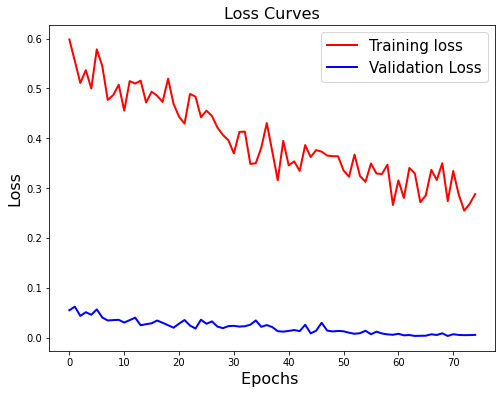

In [24]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=2.0)
plt.plot(history.history['val_loss'], 'b', linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=15)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)


Visualizing accuracy

Text(0.5, 1.0, 'Accuracy Curves')

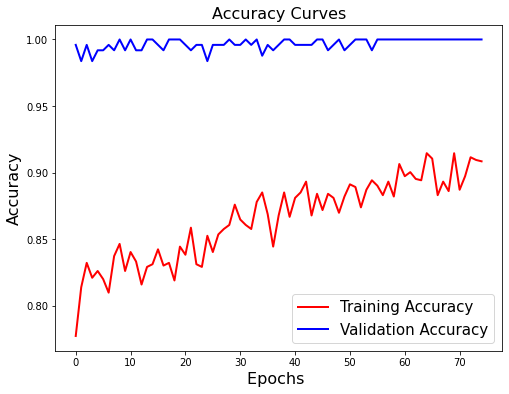

In [25]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=15)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
